Salary_Hike : Build a prediction model for Salary_Hike

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary = pd.read_csv('Salary_Data.csv')

In [3]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salary = salary.rename(columns = {
    'YearsExperience' : 'yearexp',
    'Salary' : 'salary'
})

In [7]:
salary.head()

,yearexp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='yearexp', ylabel='salary'>

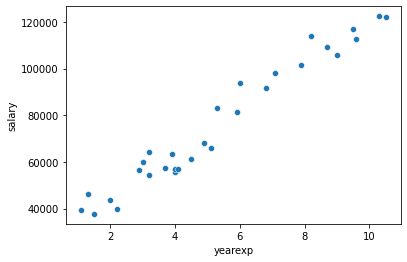

In [8]:
# scatterplot for salary dataset
sns.scatterplot(x = 'yearexp', y = 'salary', data = salary)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yearexp', ylabel='Density'>

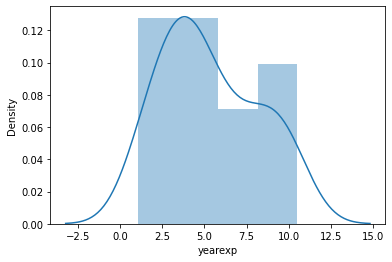

In [9]:
# distplot for yearexp
sns.distplot(salary['yearexp'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

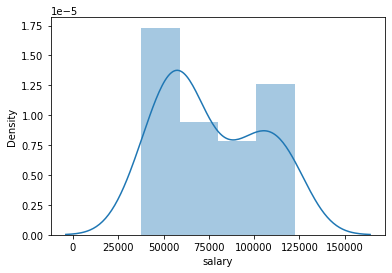

In [10]:
# distplot for salary
sns.distplot(salary['salary'])

In [11]:
# correlation coefficient
salary.corr()

,yearexp,salary
yearexp,1.000000,0.978242
salary,0.978242,1.000000


In [12]:
# Fitting Linear Regression model
import statsmodels.formula.api as smf
model = smf.ols('salary~yearexp',data = salary).fit()

<AxesSubplot:xlabel='yearexp', ylabel='salary'>

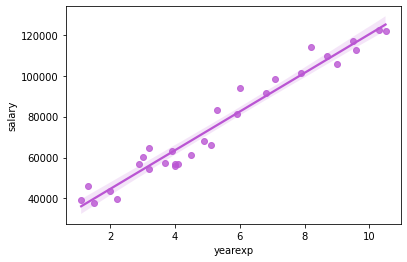

In [13]:
sns.regplot(x = 'yearexp', y = 'salary', data = salary , color = 'mediumorchid')

In [14]:
# summary of model 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        19:08:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
yearexp     9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# prediction for newdata
newdata = pd.Series([10,12])
data_pred = pd.DataFrame(newdata, columns = ['yearexp'])
data_pred

,yearexp
0,10
1,12


In [16]:
model.predict(data_pred)

0    120291.823413
1    139191.748056
dtype: float64